# Ireland Wheater

ID ELEMENT Unit

rain -Precipitation Amount mm

temp - Air Temperature °C

wetb - Wet Bulb Air Temperature °C

dewpt - Dew Point Air Temperature °C

vappr - Vapour Pressure hpa

rhum - Relative Humidity %

msl - Mean Sea Level Pressure hPa

wdsp - Mean Hourly Wind Speed kt

wddir - Predominant Hourly wind Direction kt

sun - Sunshine duration hours

vis - Visibility m

clht - Cloud Ceiling Height - if none value is 999 100s feet

clamt - Cloud Amount okta

Key Questions

1. Which hours of the day are rainier?
2. Which month is rainier?
3. Which season is rainier?
4. Cork or Galway is rainier?


In [13]:
#downloading libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from ipywidgets import interact



In [14]:
#Installing Kaggle API library
!pip install kaggle

In [15]:
#Creating a local repository for Kaggle
!mkdir ~\.kaggle

#Copy the API json file downloaded (local Downloads folder) to the Kaggle directory
!cp C:\Users\henri\Downloads\kaggle.json C:\Users/henri\.kaggle\kaggle.json

#Checking if the file was copied from the Downloads folder and list it if so
!ls C:\Users\henri\.kaggle

J� existe uma subpasta ou um arquivo ~\.kaggle.


kaggle.json


In [16]:
#Search the desired dataset on Kaggle
!kaggle datasets list -s 'Irish'

ref                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
therohk/ireland-historical-news                       Irish Times - Waxy-Wany News                         52MB  2021-09-25 10:52:48           3631        163  1.0              
conorrot/irish-weather-hourly-data                    Irish Weather (hourly data)                          67MB  2020-06-29 20:15:18           3159         51  0.8235294        
mpwolke/cusersmarildownloadsirishcsv                  Saint Patricks - Irish Whiskey Sales                 17KB  2023-03-17 22:26:32             79         17  1.0              
ikpeleambrose/irish-loan-data                         Irish Loan Data                                     248M

In [17]:
#Download the "Irish Weather (hourly data)" dataset from the API using the reference
!kaggle datasets download -d conorrot/irish-weather-hourly-data

Dataset URL: https://www.kaggle.com/datasets/conorrot/irish-weather-hourly-data
License(s): Attribution 4.0 International (CC BY 4.0)
irish-weather-hourly-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [18]:
#Unzip the file
#If necessary to dowload unzip: !sudo apt-get install unzip
!unzip irish-weather-hourly-data.zip -d data\

^C


## Loading Dataset

In [19]:
ie_wheater_df_original = pd.read_csv(r'C:\Users\henri\IrelandWeather\data\hrly_Irish_weather.csv')


C:\Users\henri\AppData\Local\Temp\ipykernel_20008\3319222492.py:1: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  ie_wheater_df_original = pd.read_csv(r'C:\Users\henri\IrelandWeather\data\hrly_Irish_weather.csv')


In [20]:
ie_wheater_df_original.head(20)

,county,station,latitude,longitude,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt
0,Galway,ATHENRY,53.289,-8.786,26-jun-2011 01:00,0.0,15.3,14.5,13.9,15.8,90,1016.0,8,190,NaN,NaN,NaN,NaN
1,Galway,ATHENRY,53.289,-8.786,26-jun-2011 02:00,0.0,14.7,13.7,12.9,14.9,89,1015.8,7,190,NaN,NaN,NaN,NaN
2,Galway,ATHENRY,53.289,-8.786,26-jun-2011 03:00,0.0,14.3,13.4,12.6,14.6,89,1015.5,6,190,NaN,NaN,NaN,NaN
3,Galway,ATHENRY,53.289,-8.786,26-jun-2011 04:00,0.0,14.4,13.6,12.8,14.8,90,1015.3,7,180,NaN,NaN,NaN,NaN
4,Galway,ATHENRY,53.289,-8.786,26-jun-2011 05:00,0.0,14.4,13.5,12.7,14.7,89,1015.1,6,190,NaN,NaN,NaN,NaN
5,Galway,ATHENRY,53.289,-8.786,26-jun-2011 06:00,0.0,14.9,13.8,13.0,15.0,88,1015.0,8,180,NaN,NaN,NaN,NaN
6,Galway,ATHENRY,53.289,-8.786,26-jun-2011 07:00,0.0,15.1,13.5,12.2,14.2,83,1014.9,8,180,NaN,NaN,NaN,NaN
7,Galway,ATHENRY,53.289,-8.786,26-jun-2011 08:00,0.0,15.2,13.0,11.1,13.2,76,1014.7,7,170,NaN,NaN,NaN,NaN
8,Galway,ATHENRY,53.289,-8.786,26-jun-2011 09:00,0.0,16.1,13.2,10.8,12.9,70,1014.4,7,160,NaN,NaN,NaN,NaN
9,Galway,ATHENRY,53.289,-8.786,26-jun-2011 10:00,0.0,16.8,13.3,10.3,12.5,65,1014.1,10,180,NaN,NaN,NaN,NaN


In [21]:
#Create a copy of original dataset

df = ie_wheater_df_original.copy()

## Exploratory analysis

In [22]:
df.columns

Index(['county', 'station', 'latitude', 'longitude', 'date', 'rain', 'temp',
       'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'wdsp', 'wddir', 'sun', 'vis',
       'clht', 'clamt'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4660423 entries, 0 to 4660422
Data columns (total 18 columns):
 #   Column     Dtype  
---  ------     -----  
 0   county     object 
 1   station    object 
 2   latitude   float64
 3   longitude  float64
 4   date       object 
 5   rain       object 
 6   temp       object 
 7   wetb       object 
 8   dewpt      object 
 9   vappr      object 
 10  rhum       object 
 11  msl        object 
 12  wdsp       object 
 13  wddir      object 
 14  sun        object 
 15  vis        object 
 16  clht       object 
 17  clamt      object 
dtypes: float64(2), object(16)
memory usage: 640.0+ MB


In [24]:
#Adjusting column types
for i in ['county','station']:
  df[i] = df[i].astype('category')
for i in ['rain','temp','wetb', 'dewpt', 'vappr','msl','rhum','wdsp', 'wddir']:
  df[i] = pd.to_numeric(df[i],errors='coerce')

In [25]:
#Adjusting date column types
#https://stackoverflow.com/questions/29882573/pandas-slow-date-conversion
def lookup(date_pd_series, format=None):
    """
    This is an extremely fast approach to datetime parsing.
    For large data, the same dates are often repeated. Rather than
    re-parse these, we store all unique dates, parse them, and
    use a lookup to convert all dates.
    """
    dates = {date:pd.to_datetime(date, format=format) for date in date_pd_series.unique()}
    return date_pd_series.map(dates)

df['date'] = lookup(df['date'], format="%d-%b-%Y %H:%M")



In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4660423 entries, 0 to 4660422
Data columns (total 18 columns):
 #   Column     Dtype         
---  ------     -----         
 0   county     category      
 1   station    category      
 2   latitude   float64       
 3   longitude  float64       
 4   date       datetime64[ns]
 5   rain       float64       
 6   temp       float64       
 7   wetb       float64       
 8   dewpt      float64       
 9   vappr      float64       
 10  rhum       float64       
 11  msl        float64       
 12  wdsp       float64       
 13  wddir      float64       
 14  sun        object        
 15  vis        object        
 16  clht       object        
 17  clamt      object        
dtypes: category(2), datetime64[ns](1), float64(11), object(4)
memory usage: 577.8+ MB


In [27]:
#Numeric description of columns
df.describe()

,latitude,longitude,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir
count,4.660423e+06,4.660423e+06,4.548758e+06,4.627842e+06,4.615135e+06,4.616264e+06,4.472939e+06,4.496808e+06,4.587140e+06,4.349414e+06,4.334055e+06
mean,5.325453e+01,-8.181232e+00,1.240679e-01,9.967762e+00,8.675061e+00,7.229586e+00,1.057877e+01,8.367801e+01,1.013255e+03,9.672500e+00,1.999520e+02
std,9.898850e-01,1.220681e+00,4.845204e-01,4.711385e+00,4.312898e+00,4.473830e+00,3.155292e+00,1.184582e+01,1.259385e+01,6.204023e+00,9.089430e+01
min,5.147600e+01,-1.024100e+01,0.000000e+00,-1.730000e+01,-9.990000e+01,-9.240000e+01,0.000000e+00,-1.400000e+01,9.432000e+02,0.000000e+00,0.000000e+00
25%,5.229800e+01,-8.993000e+00,0.000000e+00,6.800000e+00,5.700000e+00,4.000000e+00,8.100000e+00,7.700000e+01,1.005600e+03,5.000000e+00,1.400000e+02
50%,5.342800e+01,-8.244000e+00,0.000000e+00,1.010000e+01,8.900000e+00,7.500000e+00,1.040000e+01,8.600000e+01,1.014500e+03,9.000000e+00,2.100000e+02
75%,5.390600e+01,-7.310000e+00,0.000000e+00,1.340000e+01,1.190000e+01,1.060000e+01,1.270000e+01,9.300000e+01,1.022000e+03,1.300000e+01,2.700000e+02
max,5.537200e+01,-6.241000e+00,4.140000e+01,3.150000e+01,2.490000e+01,2.380000e+01,2.950000e+01,1.000000e+02,1.051200e+03,9.700000e+01,3.600000e+02


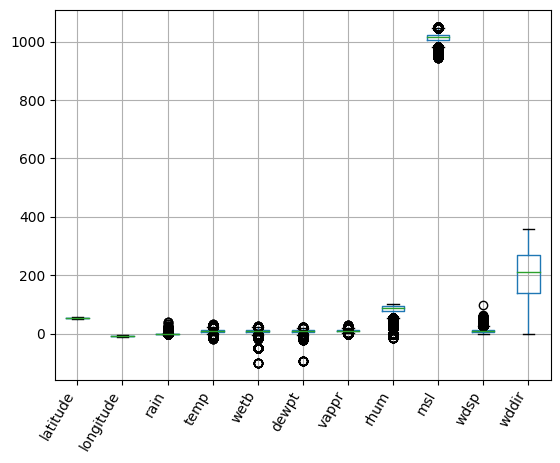

In [28]:
#Columns distribution
df.boxplot()
plt.xticks(rotation = 60, ha='right')
plt.show()

## Null values

In [29]:
# Couting null values per feature
for i in df.columns:
  nan_count = df[i].isnull().sum()
  nan_percent = (nan_count/len(df[i]))*100
  print(f"{i}: {nan_count}")
  print(f'Perc. de nulos: {nan_percent} %')
  print('--------')

county: 0
Perc. de nulos: 0.0 %
--------
station: 0
Perc. de nulos: 0.0 %
--------
latitude: 0
Perc. de nulos: 0.0 %
--------
longitude: 0
Perc. de nulos: 0.0 %
--------
date: 0
Perc. de nulos: 0.0 %
--------
rain: 111665
Perc. de nulos: 2.396027141742284 %
--------
temp: 32581
Perc. de nulos: 0.6990996310849895 %
--------
wetb: 45288
Perc. de nulos: 0.9717572846928273 %
--------
dewpt: 44159
Perc. de nulos: 0.9475320158706623 %
--------
vappr: 187484
Perc. de nulos: 4.0228966340609 %
--------
rhum: 163615
Perc. de nulos: 3.510732824037646 %
--------
msl: 73283
Perc. de nulos: 1.5724538309076237 %
--------
wdsp: 311009
Perc. de nulos: 6.673407113474464 %
--------
wddir: 326368
Perc. de nulos: 7.002969472942692 %
--------
sun: 2585167
Perc. de nulos: 55.470651483781616 %
--------
vis: 2585167
Perc. de nulos: 55.470651483781616 %
--------
clht: 2585167
Perc. de nulos: 55.470651483781616 %
--------
clamt: 2585167
Perc. de nulos: 55.470651483781616 %
--------


In [30]:
# Avaliando nulos

for i in df:
  nan_count = df[i].isnull().sum()
  print(f"{i}: {nan_count}")
  print('--------')

county: 0
--------
station: 0
--------
latitude: 0
--------
longitude: 0
--------
date: 0
--------
rain: 111665
--------
temp: 32581
--------
wetb: 45288
--------
dewpt: 44159
--------
vappr: 187484
--------
rhum: 163615
--------
msl: 73283
--------
wdsp: 311009
--------
wddir: 326368
--------
sun: 2585167
--------
vis: 2585167
--------
clht: 2585167
--------
clamt: 2585167
--------


In [31]:
#Dropping columns with many null values
df = df.drop(columns = ['sun','vis','clht','clamt'])
df.head(10)

,county,station,latitude,longitude,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir
0,Galway,ATHENRY,53.289,-8.786,2011-06-26 01:00:00,0.0,15.3,14.5,13.9,15.8,90.0,1016.0,8.0,190.0
1,Galway,ATHENRY,53.289,-8.786,2011-06-26 02:00:00,0.0,14.7,13.7,12.9,14.9,89.0,1015.8,7.0,190.0
2,Galway,ATHENRY,53.289,-8.786,2011-06-26 03:00:00,0.0,14.3,13.4,12.6,14.6,89.0,1015.5,6.0,190.0
3,Galway,ATHENRY,53.289,-8.786,2011-06-26 04:00:00,0.0,14.4,13.6,12.8,14.8,90.0,1015.3,7.0,180.0
4,Galway,ATHENRY,53.289,-8.786,2011-06-26 05:00:00,0.0,14.4,13.5,12.7,14.7,89.0,1015.1,6.0,190.0
5,Galway,ATHENRY,53.289,-8.786,2011-06-26 06:00:00,0.0,14.9,13.8,13.0,15.0,88.0,1015.0,8.0,180.0
6,Galway,ATHENRY,53.289,-8.786,2011-06-26 07:00:00,0.0,15.1,13.5,12.2,14.2,83.0,1014.9,8.0,180.0
7,Galway,ATHENRY,53.289,-8.786,2011-06-26 08:00:00,0.0,15.2,13.0,11.1,13.2,76.0,1014.7,7.0,170.0
8,Galway,ATHENRY,53.289,-8.786,2011-06-26 09:00:00,0.0,16.1,13.2,10.8,12.9,70.0,1014.4,7.0,160.0
9,Galway,ATHENRY,53.289,-8.786,2011-06-26 10:00:00,0.0,16.8,13.3,10.3,12.5,65.0,1014.1,10.0,180.0


In [32]:
#Dropping NA from the columns
df = df.dropna()

In [33]:
# Couting null values per feature
for i in df.columns:
  nan_count = df[i].isnull().sum()
  nan_percent = (nan_count/len(df[i]))*100
  print(f"{i}: {nan_count}")
  print(f'Perc. de nulos: {nan_percent} %')
  print('--------')

county: 0
Perc. de nulos: 0.0 %
--------
station: 0
Perc. de nulos: 0.0 %
--------
latitude: 0
Perc. de nulos: 0.0 %
--------
longitude: 0
Perc. de nulos: 0.0 %
--------
date: 0
Perc. de nulos: 0.0 %
--------
rain: 0
Perc. de nulos: 0.0 %
--------
temp: 0
Perc. de nulos: 0.0 %
--------
wetb: 0
Perc. de nulos: 0.0 %
--------
dewpt: 0
Perc. de nulos: 0.0 %
--------
vappr: 0
Perc. de nulos: 0.0 %
--------
rhum: 0
Perc. de nulos: 0.0 %
--------
msl: 0
Perc. de nulos: 0.0 %
--------
wdsp: 0
Perc. de nulos: 0.0 %
--------
wddir: 0
Perc. de nulos: 0.0 %
--------


##Duplicate values

In [34]:
# Checking duplicates

#print(df.duplicated().value_counts())
#print('============================')
#print(df[df.duplicated()].sample(20))

#duplicate values found

## Data Analysis

In [35]:
#Checkin if the amount of data is similar between subsets
df[df['county'] == 'Galway'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213876 entries, 0 to 2438115
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   county     213876 non-null  category      
 1   station    213876 non-null  category      
 2   latitude   213876 non-null  float64       
 3   longitude  213876 non-null  float64       
 4   date       213876 non-null  datetime64[ns]
 5   rain       213876 non-null  float64       
 6   temp       213876 non-null  float64       
 7   wetb       213876 non-null  float64       
 8   dewpt      213876 non-null  float64       
 9   vappr      213876 non-null  float64       
 10  rhum       213876 non-null  float64       
 11  msl        213876 non-null  float64       
 12  wdsp       213876 non-null  float64       
 13  wddir      213876 non-null  float64       
dtypes: category(2), datetime64[ns](1), float64(11)
memory usage: 21.6 MB


In [36]:
df[df['county'] == 'Cork'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742192 entries, 1011830 to 4393806
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   county     742192 non-null  category      
 1   station    742192 non-null  category      
 2   latitude   742192 non-null  float64       
 3   longitude  742192 non-null  float64       
 4   date       742192 non-null  datetime64[ns]
 5   rain       742192 non-null  float64       
 6   temp       742192 non-null  float64       
 7   wetb       742192 non-null  float64       
 8   dewpt      742192 non-null  float64       
 9   vappr      742192 non-null  float64       
 10  rhum       742192 non-null  float64       
 11  msl        742192 non-null  float64       
 12  wdsp       742192 non-null  float64       
 13  wddir      742192 non-null  float64       
dtypes: category(2), datetime64[ns](1), float64(11)
memory usage: 75.0 MB


### Which hours of the day are rainier

In [37]:
df_hour_days = df.copy()

In [38]:
df_hour_days.sample(10)

,county,station,latitude,longitude,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir
4200206,Clare,SHANNON AIRPORT,52.690,-8.918,2014-06-02 08:00:00,0.1,12.6,11.8,11.0,13.2,90.0,1018.8,8.0,280.0
471234,Mayo,BELMULLET,54.228,-10.007,2019-07-28 18:00:00,0.0,15.6,13.2,11.1,13.2,74.0,1009.9,8.0,340.0
2533921,Donegal,MALIN HEAD,55.372,-7.339,2000-12-05 21:00:00,0.0,9.1,7.9,6.5,9.7,84.0,985.7,18.0,170.0
4043836,Clare,SHANNON AIRPORT,52.690,-8.918,1996-07-30 22:00:00,0.0,15.1,12.4,10.0,12.2,71.0,1015.1,7.0,260.0
1151977,Cork,CORK AIRPORT,51.847,-8.486,2005-12-27 11:00:00,0.0,3.1,2.3,0.9,6.6,86.0,1020.2,8.0,40.0
3398909,Mayo,NEWPORT,53.922,-9.572,2012-03-05 00:00:00,0.0,5.6,3.9,1.3,6.7,74.0,1027.8,7.0,290.0
3791807,Cork,ROCHES POINT,51.793,-8.244,1998-02-20 18:00:00,0.0,9.6,8.5,7.3,10.2,85.0,997.5,33.0,220.0
1423844,Dublin,DUBLIN AIRPORT,53.428,-6.241,2006-08-03 05:00:00,0.0,10.8,9.8,8.7,11.3,87.0,1018.7,8.0,310.0
2885726,Cork,MOORE PARK,52.164,-8.264,2011-10-22 10:00:00,0.5,12.3,11.7,11.1,13.2,92.0,1003.1,12.0,170.0
4440117,Kerry,VALENTIA OBSERVATORY,51.938,-10.241,1995-04-14 14:00:00,0.0,12.5,10.5,8.5,11.1,77.0,1039.2,6.0,280.0


In [39]:
def hr_fund(time_stamp):
    return time_stamp.hour

df_hour_days['hour'] = df_hour_days['date'].apply(hr_fund)

In [40]:
df_hour_days.head()

,county,station,latitude,longitude,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,hour
0,Galway,ATHENRY,53.289,-8.786,2011-06-26 01:00:00,0.0,15.3,14.5,13.9,15.8,90.0,1016.0,8.0,190.0,1
1,Galway,ATHENRY,53.289,-8.786,2011-06-26 02:00:00,0.0,14.7,13.7,12.9,14.9,89.0,1015.8,7.0,190.0,2
2,Galway,ATHENRY,53.289,-8.786,2011-06-26 03:00:00,0.0,14.3,13.4,12.6,14.6,89.0,1015.5,6.0,190.0,3
3,Galway,ATHENRY,53.289,-8.786,2011-06-26 04:00:00,0.0,14.4,13.6,12.8,14.8,90.0,1015.3,7.0,180.0,4
4,Galway,ATHENRY,53.289,-8.786,2011-06-26 05:00:00,0.0,14.4,13.5,12.7,14.7,89.0,1015.1,6.0,190.0,5


#### Hours that are rainier in Galway?

In [41]:
#Data measurement period in Galway
newest_date_Galway = df_hour_days[df_hour_days['county'] == 'Galway']['date'].max()
oldest_date_Galway = df_hour_days[df_hour_days['county'] == 'Galway']['date'].min()

print('Newest date Galway: ',newest_date_Galway,'\nOldest date Galway: ',oldest_date_Galway)

Newest date Galway:  2020-06-01 00:00:00 
Oldest date Galway:  2004-08-01 01:00:00


In [42]:
#Creating a column to check the days that rainned
def rain_check(rain_volume):
    if rain_volume > 0:
        return 1
    else:
        return 0

df_hour_days['rain_check'] = df_hour_days['rain'].apply(rain_check)

In [43]:
#Daily percentage rain in each hour (Galway):

hour = []
rainning_days = []
cell = []
percentage = []

for i in range(1,24):
    hour.append(int(i)) 
    total_rainning_days = df_hour_days[(df_hour_days['county']=='Galway') & (df_hour_days['hour']==i) & (df_hour_days['rain_check'] == 1)]['hour'].count()
    rainning_days.append(total_rainning_days)
    total_cell = df_hour_days[(df_hour_days['county']=='Galway') & (df_hour_days['hour']==i)]['rain'].count()
    cell.append(total_cell)
    rain_percentage = (total_rainning_days/total_cell)*100
    percentage.append(rain_percentage)

daily_percentage_rain_Galway = pd.DataFrame({'hour':hour,
                                            'total_rainning_days':rainning_days,
                                            'total_cell':cell,
                                            'rain_percentage':percentage})
print(daily_percentage_rain_Galway)

    hour  total_rainning_days  total_cell  rain_percentage
0      1                 1848        8912        20.736086
1      2                 1884        8913        21.137664
2      3                 1910        8912        21.431777
3      4                 2031        8912        22.789497
4      5                 2035        8912        22.834381
5      6                 2010        8912        22.553860
6      7                 1993        8911        22.365616
7      8                 1979        8909        22.213492
8      9                 1914        8911        21.479071
9     10                 1775        8909        19.923673
10    11                 1745        8907        19.591333
11    12                 1696        8911        19.032656
12    13                 1669        8908        18.735968
13    14                 1732        8912        19.434470
14    15                 1698        8910        19.057239
15    16                 1694        8909        19.0144

In [44]:
#Select just the Galway subset
df_hour_days_Galway = df_hour_days[df_hour_days['county'] == 'Galway']
df_hour_days_Galway.head(10)

,county,station,latitude,longitude,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,hour,rain_check
0,Galway,ATHENRY,53.289,-8.786,2011-06-26 01:00:00,0.0,15.3,14.5,13.9,15.8,90.0,1016.0,8.0,190.0,1,0
1,Galway,ATHENRY,53.289,-8.786,2011-06-26 02:00:00,0.0,14.7,13.7,12.9,14.9,89.0,1015.8,7.0,190.0,2,0
2,Galway,ATHENRY,53.289,-8.786,2011-06-26 03:00:00,0.0,14.3,13.4,12.6,14.6,89.0,1015.5,6.0,190.0,3,0
3,Galway,ATHENRY,53.289,-8.786,2011-06-26 04:00:00,0.0,14.4,13.6,12.8,14.8,90.0,1015.3,7.0,180.0,4,0
4,Galway,ATHENRY,53.289,-8.786,2011-06-26 05:00:00,0.0,14.4,13.5,12.7,14.7,89.0,1015.1,6.0,190.0,5,0
5,Galway,ATHENRY,53.289,-8.786,2011-06-26 06:00:00,0.0,14.9,13.8,13.0,15.0,88.0,1015.0,8.0,180.0,6,0
6,Galway,ATHENRY,53.289,-8.786,2011-06-26 07:00:00,0.0,15.1,13.5,12.2,14.2,83.0,1014.9,8.0,180.0,7,0
7,Galway,ATHENRY,53.289,-8.786,2011-06-26 08:00:00,0.0,15.2,13.0,11.1,13.2,76.0,1014.7,7.0,170.0,8,0
8,Galway,ATHENRY,53.289,-8.786,2011-06-26 09:00:00,0.0,16.1,13.2,10.8,12.9,70.0,1014.4,7.0,160.0,9,0
9,Galway,ATHENRY,53.289,-8.786,2011-06-26 10:00:00,0.0,16.8,13.3,10.3,12.5,65.0,1014.1,10.0,180.0,10,0


In [45]:
# Sum of the rain volume in the specific hours
hour_volume_Galway = df_hour_days_Galway.groupby('hour').agg({'rain':['mean','sum','min','max']})
print(hour_volume_Galway)


          rain                   
          mean     sum  min   max
hour                             
0     0.126030  1122.8  0.0   8.6
1     0.127087  1132.6  0.0   7.5
2     0.136811  1219.4  0.0  10.8
3     0.141932  1264.9  0.0   8.7
4     0.148036  1319.3  0.0   9.5
5     0.144805  1290.5  0.0  12.6
6     0.139441  1242.7  0.0  12.2
7     0.144686  1289.3  0.0  14.4
8     0.135661  1208.6  0.0  11.1
9     0.131366  1170.6  0.0  11.6
10    0.124312  1107.5  0.0   6.4
11    0.124116  1105.5  0.0   9.6
12    0.121344  1081.3  0.0   8.3
13    0.122485  1091.1  0.0   9.6
14    0.118683  1057.7  0.0   9.9
15    0.120460  1073.3  0.0  14.2
16    0.126468  1126.7  0.0  22.7
17    0.128007  1140.8  0.0   7.8
18    0.126374  1126.5  0.0   9.6
19    0.135367  1207.2  0.0  14.6
20    0.130223  1161.2  0.0   8.8
21    0.127654  1137.4  0.0  12.4
22    0.122793  1094.7  0.0  13.0
23    0.128515  1145.2  0.0  11.0


In [46]:
#Daily percentage rain in each hour:
df_hour_days[df_hour_days['county']=='Galway'].groupby('hour').agg({'rain_check':'sum'})


,rain_check
hour,
0,1820
1,1848
2,1884
3,1910
4,2031
5,2035
6,2010
7,1993
8,1979


In [47]:
#How many days rained at any hour

#Remove every time that didn't rain
df_hour_norain_days_Galway = df_hour_days_Galway[df_hour_days_Galway['rain'] != 0]
df_hour_norain_days_Galway.head(20)

#Groupby the values the hours that rained
onlyrain_hour_volume_Galway = df_hour_norain_days_Galway.groupby('hour').agg({'rain':['mean','sum','min','max','count']})
print(onlyrain_hour_volume_Galway)



          rain                         
          mean     sum  min   max count
hour                                   
0     0.616923  1122.8  0.1   8.6  1820
1     0.612879  1132.6  0.1   7.5  1848
2     0.647240  1219.4  0.1  10.8  1884
3     0.662251  1264.9  0.1   8.7  1910
4     0.649581  1319.3  0.1   9.5  2031
5     0.634152  1290.5  0.1  12.6  2035
6     0.618259  1242.7  0.1  12.2  2010
7     0.646914  1289.3  0.1  14.4  1993
8     0.610712  1208.6  0.1  11.1  1979
9     0.611599  1170.6  0.1  11.6  1914
10    0.623944  1107.5  0.1   6.4  1775
11    0.633524  1105.5  0.1   9.6  1745
12    0.637559  1081.3  0.1   8.3  1696
13    0.653745  1091.1  0.1   9.6  1669
14    0.610681  1057.7  0.1   9.9  1732
15    0.632097  1073.3  0.1  14.2  1698
16    0.665112  1126.7  0.1  22.7  1694
17    0.692653  1140.8  0.1   7.8  1647
18    0.654181  1126.5  0.1   9.6  1722
19    0.703907  1207.2  0.1  14.6  1715
20    0.675116  1161.2  0.1   8.8  1720
21    0.663981  1137.4  0.1  12.4  1713


#### Hours that are rainier in Cork

In [48]:
#Data measurement period Cork
oldest_date_Cork = df_hour_days[df_hour_days['county'] == 'Cork']['date'].min()
newest_date_Cork = df_hour_days[df_hour_days['county'] == 'Cork']['date'].max()

print('Newest date Cork: ',newest_date_Cork,'\nOldest date Cork: ',oldest_date_Cork)

Newest date Cork:  2020-06-01 00:00:00 
Oldest date Cork:  1990-01-01 00:00:00


In [49]:
#Select just the Cork subset
df_hour_days_Cork = df_hour_days[df_hour_days['county'] == 'Cork']
df_hour_days_Cork.head(10)

,county,station,latitude,longitude,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,hour,rain_check
1011830,Cork,CORK AIRPORT,51.847,-8.486,1990-01-01 00:00:00,1.4,7.8,7.7,7.6,10.4,99.0,1006.7,9.0,200.0,0,1
1011831,Cork,CORK AIRPORT,51.847,-8.486,1990-01-01 01:00:00,0.0,6.6,6.3,5.9,9.3,95.0,1007.0,8.0,210.0,1,0
1011832,Cork,CORK AIRPORT,51.847,-8.486,1990-01-01 02:00:00,0.0,6.1,5.8,5.4,9.0,95.0,1007.3,8.0,210.0,2,0
1011833,Cork,CORK AIRPORT,51.847,-8.486,1990-01-01 03:00:00,0.0,6.2,5.9,5.5,9.0,95.0,1007.6,8.0,200.0,3,0
1011834,Cork,CORK AIRPORT,51.847,-8.486,1990-01-01 04:00:00,0.0,6.3,5.5,4.4,8.4,88.0,1007.8,9.0,220.0,4,0
1011835,Cork,CORK AIRPORT,51.847,-8.486,1990-01-01 05:00:00,0.0,5.9,5.1,4.0,8.1,88.0,1007.8,7.0,220.0,5,0
1011836,Cork,CORK AIRPORT,51.847,-8.486,1990-01-01 06:00:00,0.1,4.7,4.3,3.7,8.0,93.0,1008.6,5.0,210.0,6,1
1011837,Cork,CORK AIRPORT,51.847,-8.486,1990-01-01 07:00:00,0.0,5.7,4.2,2.0,7.0,77.0,1008.5,7.0,220.0,7,0
1011838,Cork,CORK AIRPORT,51.847,-8.486,1990-01-01 08:00:00,0.0,4.0,3.4,2.5,7.3,90.0,1009.2,7.0,200.0,8,0
1011839,Cork,CORK AIRPORT,51.847,-8.486,1990-01-01 09:00:00,0.0,4.7,4.0,3.0,7.6,89.0,1009.7,6.0,210.0,9,0


In [50]:
#Data measurement period Cork
oldest_date_Cork = df_hour_days_Cork['date'].min()
newest_date_Cork = df_hour_days_Cork['date'].max()

print('Newest date Cork: ',newest_date_Cork,'\nOldest date Cork: ',oldest_date_Cork)

Newest date Cork:  2020-06-01 00:00:00 
Oldest date Cork:  1990-01-01 00:00:00


In [51]:
# Sum of the rain volume in the specific hours
hour_volume_Cork = df_hour_days_Cork.groupby('hour').agg({'rain':['mean','sum','min','max']})
print(hour_volume_Cork)

          rain                   
          mean     sum  min   max
hour                             
0     0.112807  3482.7  0.0  14.8
1     0.116746  3603.6  0.0  18.3
2     0.118434  3657.6  0.0  16.2
3     0.117510  3628.6  0.0  14.9
4     0.118267  3656.0  0.0  13.5
5     0.123327  3811.3  0.0  10.4
6     0.123703  3821.8  0.0  12.5
7     0.119760  3702.5  0.0  17.9
8     0.116957  3617.0  0.0  10.4
9     0.117126  3621.9  0.0  12.4
10    0.112665  3483.7  0.0  14.4
11    0.113723  3518.6  0.0  12.0
12    0.116295  3598.4  0.0  15.4
13    0.115241  3568.2  0.0  16.6
14    0.120343  3724.5  0.0  18.5
15    0.119006  3683.7  0.0  17.6
16    0.120050  3717.7  0.0  21.7
17    0.115255  3568.3  0.0  19.4
18    0.114594  3546.9  0.0  23.4
19    0.114536  3546.5  0.0  12.7
20    0.111283  3444.1  0.0  16.3
21    0.109191  3376.2  0.0  16.9
22    0.110272  3409.4  0.0  10.7
23    0.109161  3374.5  0.0  12.0


In [52]:
#How many days rained at any hour

#Remove every time that didn't rain
df_hour_norain_days_Cork = df_hour_days_Cork[df_hour_days_Cork['rain'] != 0]
df_hour_norain_days_Cork.head(20)

#Groupby the values the hours that rained
onlyrain_hour_volume_Cork = df_hour_norain_days_Cork.groupby('hour').agg({'rain':['mean','sum','min','max','count']})
print(onlyrain_hour_volume_Cork)

          rain                         
          mean     sum  min   max count
hour                                   
0     0.717639  3482.7  0.1  14.8  4853
1     0.723469  3603.6  0.1  18.3  4981
2     0.713121  3657.6  0.1  16.2  5129
3     0.676851  3628.6  0.1  14.9  5361
4     0.666545  3656.0  0.1  13.5  5485
5     0.689578  3811.3  0.1  10.4  5527
6     0.688613  3821.8  0.1  12.5  5550
7     0.697532  3702.5  0.1  17.9  5308
8     0.705343  3617.0  0.1  10.4  5128
9     0.728753  3621.9  0.1  12.4  4970
10    0.737603  3483.7  0.1  14.4  4723
11    0.757829  3518.6  0.1  12.0  4643
12    0.757877  3598.4  0.1  15.4  4748
13    0.760810  3568.2  0.1  16.6  4690
14    0.777395  3724.5  0.1  18.5  4791
15    0.765047  3683.7  0.1  17.6  4815
16    0.767644  3717.7  0.1  21.7  4843
17    0.752647  3568.3  0.1  19.4  4741
18    0.765243  3546.9  0.1  23.4  4635
19    0.759259  3546.5  0.1  12.7  4671
20    0.741145  3444.1  0.1  16.3  4647
21    0.727003  3376.2  0.1  16.9  4644


In [53]:
#Daily percentage rain in each hour (Cork):

hour = []
rainning_days = []
cell = []
percentage = []

for i in range(1,24):
    hour.append(int(i)) 
    total_rainning_days = df_hour_days[(df_hour_days['county']=='Cork') & (df_hour_days['hour']==i) & (df_hour_days['rain_check'] == 1)]['hour'].count()
    rainning_days.append(total_rainning_days)
    total_cell = df_hour_days[(df_hour_days['county']=='Cork') & (df_hour_days['hour']==i)]['rain'].count()
    cell.append(total_cell)
    rain_percentage = (total_rainning_days/total_cell)*100
    percentage.append(rain_percentage)

daily_percentage_rain_Galway = pd.DataFrame({'hour':hour,
                                            'total_rainning_days':rainning_days,
                                            'total_cell':cell,
                                            'rain_percentage':percentage})
print(daily_percentage_rain_Galway)

    hour  total_rainning_days  total_cell  rain_percentage
0      1                 4981       30867        16.136975
1      2                 5129       30883        16.607843
2      3                 5361       30879        17.361314
3      4                 5485       30913        17.743344
4      5                 5527       30904        17.884416
5      6                 5550       30895        17.964072
6      7                 5308       30916        17.169103
7      8                 5128       30926        16.581517
8      9                 4970       30923        16.072179
9     10                 4723       30921        15.274409
10    11                 4643       30940        15.006464
11    12                 4748       30942        15.344839
12    13                 4690       30963        15.147111
13    14                 4791       30949        15.480306
14    15                 4815       30954        15.555340
15    16                 4843       30968        15.6387

### Precipitation quantity map to show the rain quantity in each month


#### Galway

In [54]:
#Counting rainny days in each subset (e.g 2-5mm)
#The result will be: percentual: ((count of rows in the subset for each month/total rows in the meanth)*days in the month)


In [55]:
#Creating a column with the day of each measurement
df_hour_days['day'] = df_hour_days['date'].dt.date
df_hour_days['day'] = pd.to_datetime(df_hour_days['day'])

In [56]:
#Grouping the hour-rate to day-rate rain, just for Galway
county = 'Galway'
df_hour_days_groupby = (df_hour_days[df_hour_days['county'] == county].groupby('day').agg({'rain':'sum'})).reset_index()
df_hour_days_groupby['month'] = df_hour_days_groupby['day'].dt.month

#Checking the percentual of rain in every month
month = [1,2,3,4,5,6,7,8,9,10,11,12]
rain_0_list = []
rain_till_2_list = []
rain_2_5_list = []
rain_5_10_list = []
rain_10_20_list = []
rain_20_50_list = []
rain_50_100_list = []
rain_more_100_list = []


for i in range(1,13):
    if i in [4, 6, 9, 11]:
        days_in_month = 30
    elif i ==2:
        days_in_month = 28
    else:
        days_in_month = 31
        
    rain_0 = (df_hour_days_groupby[(df_hour_days_groupby['month'] == i) & (df_hour_days_groupby['rain'] == 0)]['rain'].count())/((df_hour_days_groupby[(df_hour_days_groupby['month'] == i)]['rain']).count())*days_in_month
    rain_till_2 =(df_hour_days_groupby[(df_hour_days_groupby['month'] == i) & (df_hour_days_groupby['rain'] > 0) & (df_hour_days_groupby['rain'] <= 2)]['rain'].count())/((df_hour_days_groupby[(df_hour_days_groupby['month'] == i)]['rain']).count())*days_in_month
    rain_2_5 =(df_hour_days_groupby[(df_hour_days_groupby['month'] == i) & (df_hour_days_groupby['rain'] > 2) & (df_hour_days_groupby['rain'] <= 5)]['rain'].count())/((df_hour_days_groupby[(df_hour_days_groupby['month'] == i)]['rain']).count())*days_in_month
    rain_5_10 =(df_hour_days_groupby[(df_hour_days_groupby['month'] == i) & (df_hour_days_groupby['rain'] >5) & (df_hour_days_groupby['rain'] <= 10)]['rain'].count())/((df_hour_days_groupby[(df_hour_days_groupby['month'] == i)]['rain']).count())*days_in_month
    rain_10_20 =(df_hour_days_groupby[(df_hour_days_groupby['month'] == i) & (df_hour_days_groupby['rain'] >10) & (df_hour_days_groupby['rain'] <= 20)]['rain'].count())/((df_hour_days_groupby[(df_hour_days_groupby['month'] == i)]['rain']).count())*days_in_month
    rain_20_50 =(df_hour_days_groupby[(df_hour_days_groupby['month'] == i) & (df_hour_days_groupby['rain'] >20) & (df_hour_days_groupby['rain'] <= 50)]['rain'].count())/((df_hour_days_groupby[(df_hour_days_groupby['month'] == i)]['rain']).count())*days_in_month
    rain_50_100 =(df_hour_days_groupby[(df_hour_days_groupby['month'] == i) & (df_hour_days_groupby['rain'] >50) & (df_hour_days_groupby['rain'] <= 100)]['rain'].count())/((df_hour_days_groupby[(df_hour_days_groupby['month'] == i)]['rain']).count())*days_in_month
    rain_more_100 =(df_hour_days_groupby[(df_hour_days_groupby['month'] == i) & (df_hour_days_groupby['rain'] >100)]['rain'].count())/((df_hour_days_groupby[(df_hour_days_groupby['month'] == i)]['rain']).count())*days_in_month

    rain_0_list.append(rain_0)
    rain_till_2_list.append(rain_till_2)
    rain_2_5_list.append(rain_2_5)
    rain_5_10_list.append(rain_5_10)
    rain_10_20_list.append(rain_10_20)
    rain_20_50_list.append(rain_20_50)
    rain_50_100_list.append(rain_50_100)
    rain_more_100_list.append(rain_more_100)

#Dataframe
monthly_rain_Galway = pd.DataFrame({'month':month,
                             'rain_0':rain_0_list,
                             'rain_until_2':rain_till_2_list,
                             'rain_2_5':rain_2_5_list,
                             'rain_5_10':rain_5_10_list,
                             'rain_10_20':rain_10_20_list,
                             'rain_20_50':rain_20_50_list,
                             'rain_50_100':rain_50_100_list,
                             'rain_more_100':rain_more_100_list
                             })

print(monthly_rain_Galway)


    month     rain_0  rain_until_2  rain_2_5  rain_5_10  rain_10_20  \
0       1   4.562500      8.812500  5.375000   5.312500    4.875000   
1       2   6.442478      7.000000  5.079646   4.646018    3.035398   
2       3   9.187500      8.875000  4.250000   4.312500    3.125000   
3       4  10.550847      9.661017  3.877119   2.987288    2.224576   
4       5  10.937500      7.937500  5.125000   3.500000    2.500000   
5       6  11.308204      8.248337  3.325942   3.525499    2.527716   
6       7   8.066667     10.200000  5.066667   4.066667    2.133333   
7       8   5.625000     10.750000  5.312500   4.312500    3.000000   
8       9   7.192225      8.617711  4.924406   4.600432    3.110151   
9      10   6.312500      9.500000  4.937500   4.687500    4.062500   
10     11   5.250000      9.125000  5.312500   4.187500    4.187500   
11     12   5.312500      7.687500  5.750000   4.812500    5.000000   

    rain_20_50  rain_50_100  rain_more_100  
0     2.000000     0.062500    

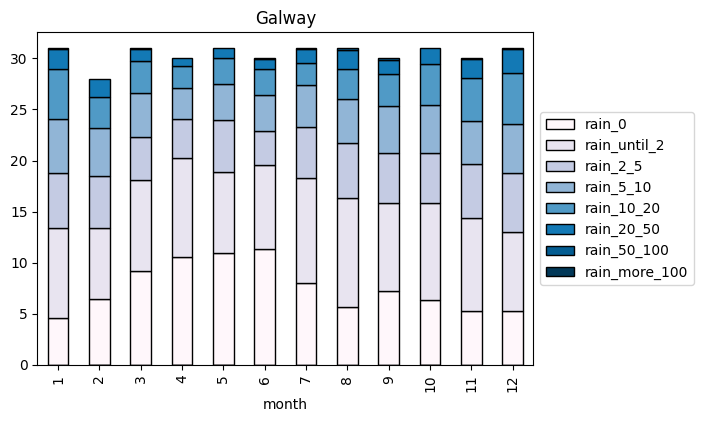

In [57]:
# Build the plot to view the Galway data
# https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot

# plot data in stack manner of bar type
Galway_plot = monthly_rain_Galway.plot(x='month', kind='bar', stacked=True,
                                       title=county,colormap='PuBu', edgecolor='black')
ax = plt.subplot(111)
# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#### Cork

In [58]:
#Grouping the hour-rate to day-rate rain, just for Cork
county = 'Cork'
df_hour_days_groupby = (df_hour_days[df_hour_days['county'] == county].groupby('day').agg({'rain':'sum'})).reset_index()
df_hour_days_groupby['month'] = df_hour_days_groupby['day'].dt.month

#Checking the percentual of rain in every month
month = [1,2,3,4,5,6,7,8,9,10,11,12]
rain_0_list = []
rain_till_2_list = []
rain_2_5_list = []
rain_5_10_list = []
rain_10_20_list = []
rain_20_50_list = []
rain_50_100_list = []
rain_more_100_list = []


for i in range(1,13):
    if i in [4, 6, 9, 11]:
        days_in_month = 30
    elif i ==2:
        days_in_month = 28
    else:
        days_in_month = 31
        
    rain_0 = (df_hour_days_groupby[(df_hour_days_groupby['month'] == i) & (df_hour_days_groupby['rain'] == 0)]['rain'].count())/((df_hour_days_groupby[(df_hour_days_groupby['month'] == i)]['rain']).count())*days_in_month
    rain_till_2 =(df_hour_days_groupby[(df_hour_days_groupby['month'] == i) & (df_hour_days_groupby['rain'] > 0) & (df_hour_days_groupby['rain'] <= 2)]['rain'].count())/((df_hour_days_groupby[(df_hour_days_groupby['month'] == i)]['rain']).count())*days_in_month
    rain_2_5 =(df_hour_days_groupby[(df_hour_days_groupby['month'] == i) & (df_hour_days_groupby['rain'] > 2) & (df_hour_days_groupby['rain'] <= 5)]['rain'].count())/((df_hour_days_groupby[(df_hour_days_groupby['month'] == i)]['rain']).count())*days_in_month
    rain_5_10 =(df_hour_days_groupby[(df_hour_days_groupby['month'] == i) & (df_hour_days_groupby['rain'] >5) & (df_hour_days_groupby['rain'] <= 10)]['rain'].count())/((df_hour_days_groupby[(df_hour_days_groupby['month'] == i)]['rain']).count())*days_in_month
    rain_10_20 =(df_hour_days_groupby[(df_hour_days_groupby['month'] == i) & (df_hour_days_groupby['rain'] >10) & (df_hour_days_groupby['rain'] <= 20)]['rain'].count())/((df_hour_days_groupby[(df_hour_days_groupby['month'] == i)]['rain']).count())*days_in_month
    rain_20_50 =(df_hour_days_groupby[(df_hour_days_groupby['month'] == i) & (df_hour_days_groupby['rain'] >20) & (df_hour_days_groupby['rain'] <= 50)]['rain'].count())/((df_hour_days_groupby[(df_hour_days_groupby['month'] == i)]['rain']).count())*days_in_month
    rain_50_100 =(df_hour_days_groupby[(df_hour_days_groupby['month'] == i) & (df_hour_days_groupby['rain'] >50) & (df_hour_days_groupby['rain'] <= 100)]['rain'].count())/((df_hour_days_groupby[(df_hour_days_groupby['month'] == i)]['rain']).count())*days_in_month
    rain_more_100 =(df_hour_days_groupby[(df_hour_days_groupby['month'] == i) & (df_hour_days_groupby['rain'] >100)]['rain'].count())/((df_hour_days_groupby[(df_hour_days_groupby['month'] == i)]['rain']).count())*days_in_month

    rain_0_list.append(rain_0)
    rain_till_2_list.append(rain_till_2)
    rain_2_5_list.append(rain_2_5)
    rain_5_10_list.append(rain_5_10)
    rain_10_20_list.append(rain_10_20)
    rain_20_50_list.append(rain_20_50)
    rain_50_100_list.append(rain_50_100)
    rain_more_100_list.append(rain_more_100)

#Dataframe
monthly_rain_Cork = pd.DataFrame({'month':month,
                             'rain_0':rain_0_list,
                             'rain_until_2':rain_till_2_list,
                             'rain_2_5':rain_2_5_list,
                             'rain_5_10':rain_5_10_list,
                             'rain_10_20':rain_10_20_list,
                             'rain_20_50':rain_20_50_list,
                             'rain_50_100':rain_50_100_list,
                             'rain_more_100':rain_more_100_list
                             })

print(monthly_rain_Cork)


    month     rain_0  rain_until_2  rain_2_5  rain_5_10  rain_10_20  \
0       1   6.000000      7.096774  4.741935   3.612903    4.612903   
1       2   6.488584      7.031963  3.963470   3.579909    3.388128   
2       3   9.258065      9.032258  3.967742   2.677419    3.064516   
3       4   9.935484      7.774194  3.677419   3.064516    2.870968   
4       5  10.548387      8.483871  3.967742   2.774194    2.516129   
5       6  10.821310      8.024417  3.695893   2.297447    2.097669   
6       7   9.900000      9.133333  3.166667   3.400000    2.300000   
7       8   9.166667      9.333333  4.000000   2.200000    2.600000   
8       9   7.966667      9.700000  4.166667   2.433333    2.666667   
9      10   6.766667      8.966667  4.066667   3.366667    3.233333   
10     11   5.933333      8.433333  4.266667   3.533333    3.333333   
11     12   6.133333      8.066667  4.466667   3.400000    4.133333   

    rain_20_50  rain_50_100  rain_more_100  
0     3.935484     0.838710    

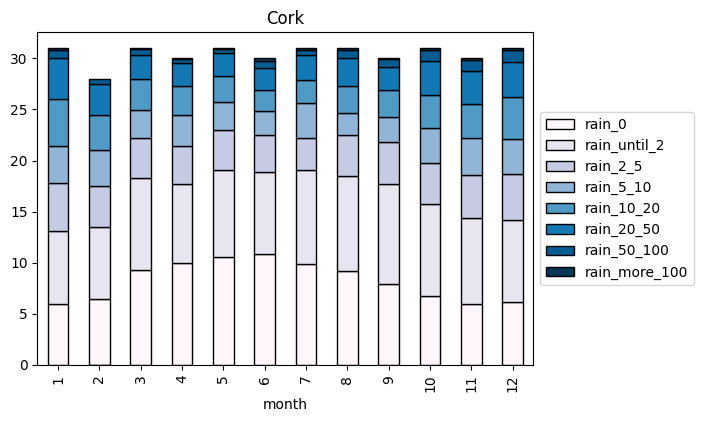

In [59]:
# Build the plot to view the Cork data
# https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot

# plot data in stack manner of bar type
Cork_plot = monthly_rain_Cork.plot(x='month', kind='bar', stacked=True,
                                       title=county,colormap='PuBu', edgecolor='black')
ax = plt.subplot(111)

# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#### All counties

In [64]:
#Create a function to to group the hour-rate to day-rate rain, for every county

def select_county(county_select,dataset):
    county = county_select
    df_hour_days_groupby = (dataset[dataset['county'] == county].groupby('day').agg({'rain':'sum'})).reset_index()
    df_hour_days_groupby['month'] = df_hour_days_groupby['day'].dt.month

    #Checking the percentual of rain in every month
    month = [1,2,3,4,5,6,7,8,9,10,11,12]
    rain_0_list = []
    rain_till_2_list = []
    rain_2_5_list = []
    rain_5_10_list = []
    rain_10_20_list = []
    rain_20_50_list = []
    rain_50_100_list = []
    rain_more_100_list = []


    for i in range(1,13):
        if i in [4, 6, 9, 11]:
            days_in_month = 30
        elif i ==2:
            days_in_month = 28
        else:
            days_in_month = 31

        rain_0 = (df_hour_days_groupby[(df_hour_days_groupby['month'] == i) & (df_hour_days_groupby['rain'] == 0)]['rain'].count())/((df_hour_days_groupby[(df_hour_days_groupby['month'] == i)]['rain']).count())*days_in_month
        rain_till_2 =(df_hour_days_groupby[(df_hour_days_groupby['month'] == i) & (df_hour_days_groupby['rain'] > 0) & (df_hour_days_groupby['rain'] <= 2)]['rain'].count())/((df_hour_days_groupby[(df_hour_days_groupby['month'] == i)]['rain']).count())*days_in_month
        rain_2_5 =(df_hour_days_groupby[(df_hour_days_groupby['month'] == i) & (df_hour_days_groupby['rain'] > 2) & (df_hour_days_groupby['rain'] <= 5)]['rain'].count())/((df_hour_days_groupby[(df_hour_days_groupby['month'] == i)]['rain']).count())*days_in_month
        rain_5_10 =(df_hour_days_groupby[(df_hour_days_groupby['month'] == i) & (df_hour_days_groupby['rain'] >5) & (df_hour_days_groupby['rain'] <= 10)]['rain'].count())/((df_hour_days_groupby[(df_hour_days_groupby['month'] == i)]['rain']).count())*days_in_month
        rain_10_20 =(df_hour_days_groupby[(df_hour_days_groupby['month'] == i) & (df_hour_days_groupby['rain'] >10) & (df_hour_days_groupby['rain'] <= 20)]['rain'].count())/((df_hour_days_groupby[(df_hour_days_groupby['month'] == i)]['rain']).count())*days_in_month
        rain_20_50 =(df_hour_days_groupby[(df_hour_days_groupby['month'] == i) & (df_hour_days_groupby['rain'] >20) & (df_hour_days_groupby['rain'] <= 50)]['rain'].count())/((df_hour_days_groupby[(df_hour_days_groupby['month'] == i)]['rain']).count())*days_in_month
        rain_50_100 =(df_hour_days_groupby[(df_hour_days_groupby['month'] == i) & (df_hour_days_groupby['rain'] >50) & (df_hour_days_groupby['rain'] <= 100)]['rain'].count())/((df_hour_days_groupby[(df_hour_days_groupby['month'] == i)]['rain']).count())*days_in_month
        rain_more_100 =(df_hour_days_groupby[(df_hour_days_groupby['month'] == i) & (df_hour_days_groupby['rain'] >100)]['rain'].count())/((df_hour_days_groupby[(df_hour_days_groupby['month'] == i)]['rain']).count())*days_in_month

        rain_0_list.append(rain_0)
        rain_till_2_list.append(rain_till_2)
        rain_2_5_list.append(rain_2_5)
        rain_5_10_list.append(rain_5_10)
        rain_10_20_list.append(rain_10_20)
        rain_20_50_list.append(rain_20_50)
        rain_50_100_list.append(rain_50_100)
        rain_more_100_list.append(rain_more_100)

    #Dataframe
    monthly_rain_county = pd.DataFrame({'month':month,
                                        'rain_0':rain_0_list,
                                        'rain_until_2':rain_till_2_list,
                                        'rain_2_5':rain_2_5_list,
                                        'rain_5_10':rain_5_10_list,
                                        'rain_10_20':rain_10_20_list,
                                        'rain_20_50':rain_20_50_list,
                                        'rain_50_100':rain_50_100_list,
                                        'rain_more_100':rain_more_100_list
                                        })
    return monthly_rain_county

monthly_rain_selected_county = select_county('Cork',df_hour_days)
print(monthly_rain_selected_county)


    month     rain_0  rain_until_2  rain_2_5  rain_5_10  rain_10_20  \
0       1   6.000000      7.096774  4.741935   3.612903    4.612903   
1       2   6.488584      7.031963  3.963470   3.579909    3.388128   
2       3   9.258065      9.032258  3.967742   2.677419    3.064516   
3       4   9.935484      7.774194  3.677419   3.064516    2.870968   
4       5  10.548387      8.483871  3.967742   2.774194    2.516129   
5       6  10.821310      8.024417  3.695893   2.297447    2.097669   
6       7   9.900000      9.133333  3.166667   3.400000    2.300000   
7       8   9.166667      9.333333  4.000000   2.200000    2.600000   
8       9   7.966667      9.700000  4.166667   2.433333    2.666667   
9      10   6.766667      8.966667  4.066667   3.366667    3.233333   
10     11   5.933333      8.433333  4.266667   3.533333    3.333333   
11     12   6.133333      8.066667  4.466667   3.400000    4.133333   

    rain_20_50  rain_50_100  rain_more_100  
0     3.935484     0.838710    

#### Grouped chart

##### Interact

In [61]:
@interact(County=['Cork', 'Galway'])
def plot(County):
    # plot data in stack manner of bar type
    if County == 'Cork':
        title = 'Cork'
        df = monthly_rain_Cork
    else:
        title = 'Galway'
        df = monthly_rain_Galway

    Cork_plot = df.plot(x='month', kind='bar', stacked=True,
                                       title=title,colormap='PuBu', edgecolor='black')
    
    # Put a legend to the right of the current axis
    Cork_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Adjust layout to make room for legend
    plt.tight_layout()

    plt.show()

interactive(children=(Dropdown(description='County', options=('Cork', 'Galway'), value='Cork'), Output()), _do…

##### Plotly

In [62]:
monthly_rain_Cork

,month,rain_0,rain_until_2,rain_2_5,rain_5_10,rain_10_20,rain_20_50,rain_50_100,rain_more_100
0,1,6.000000,7.096774,4.741935,3.612903,4.612903,3.935484,0.838710,0.161290
1,2,6.488584,7.031963,3.963470,3.579909,3.388128,3.004566,0.543379,0.000000
2,3,9.258065,9.032258,3.967742,2.677419,3.064516,2.322581,0.580645,0.096774
3,4,9.935484,7.774194,3.677419,3.064516,2.870968,2.193548,0.419355,0.064516
4,5,10.548387,8.483871,3.967742,2.774194,2.516129,2.193548,0.483871,0.032258
5,6,10.821310,8.024417,3.695893,2.297447,2.097669,2.164262,0.599334,0.299667
6,7,9.900000,9.133333,3.166667,3.400000,2.300000,2.466667,0.500000,0.133333
7,8,9.166667,9.333333,4.000000,2.200000,2.600000,2.733333,0.800000,0.166667
8,9,7.966667,9.700000,4.166667,2.433333,2.666667,2.200000,0.766667,0.100000
9,10,6.766667,8.966667,4.066667,3.366667,3.233333,3.300000,1.100000,0.200000


In [63]:
#Create interactive graph to export as html file (Cork and Galway)

import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio
import plotly.express as px

# Cork data
cork_data = monthly_rain_Cork

# Galway data
galway_data = monthly_rain_Galway

# Create traces for Cork (each trace separately)
cork_traces = []
for col in cork_data:
    if col != 'month':
        trace = go.Bar(x=cork_data['month'], y=cork_data[col], name=col, marker=dict(line=dict(color='rgba(0, 0, 0, 1)', width=1)))
        cork_traces.append(trace)

# Create traces for Galway (each trace separately)
galway_traces = []
for col in galway_data:
    if col != 'month':
        trace = go.Bar(x=galway_data['month'], y=galway_data[col], name=col, marker=dict(line=dict(color='rgba(0, 0, 0, 1)', width=1)))
        galway_traces.append(trace)

# Create subplot with stacked bars 
fig = make_subplots(rows=1, cols=1)

# Add the individual traces to subplot (Cork)
for trace in cork_traces:
    fig.add_trace(trace)

# Add the individual traces to subplot (Galway)
for trace in galway_traces:
    fig.add_trace(trace)

# Update layout
fig.update_layout(
    title='Monthly Rainfall by Intensity Level',
    barmode='stack',
    xaxis_title='Month',
    yaxis_title='Rainfall (mm)',
    legend=dict(x=1.1, y=0.5),
    colorway=px.colors.sequential.Blues
)

# Define dropdown menu (when the first is selected, the second will disappear)
dropdown_menu = [{'label': 'Cork', 'method': 'update', 'args': [{'visible': [True] * len(cork_traces) + [False] * len(galway_traces)}]},
                 {'label': 'Galway', 'method': 'update', 'args': [{'visible': [False] * len(cork_traces) + [True] * len(galway_traces)}]}]

# Add dropdown menu to update traces
fig.update_layout(
    updatemenus=[
        {
            'buttons': dropdown_menu,
            'direction': 'down',
            'showactive': True,
            'x': 0.5,
            'xanchor': 'left',
            'y': 1.15,
            'yanchor': 'top'
        }
    ]
)

# Save as HTML file
filename = 'monthly_rainfall_Cork_Galway.html'
pio.write_html(fig, filename, auto_open=True)
